In [1]:
import sys
import os
import math
import matplotlib.pyplot as plt
import numpy as np

PROJECT_ROOT = os.path.abspath(os.path.join(os.path.abspath('.'),os.pardir))
sys.path.append(PROJECT_ROOT)

from egsMS import loadTable, mscat
from electronTransportCode.ProjectUtils import ERE
from electronTransportCode.Material import WaterMaterial
from electronTransportCode.ParticleModel import SimplifiedEGSnrcElectron

particle = SimplifiedEGSnrcElectron(4)

%matplotlib widget

In [2]:
ums, fms, wms, ims, llammin, llammax, dllamb, dllambi, dqms, dqmsi = loadTable()

In [3]:
N = 1000000
Ekin = 21/ERE
stepsize = 0.0725
Z = WaterMaterial.Z
eta0CONST = WaterMaterial.eta0CONST
bc = WaterMaterial.bc

muArray = np.fromiter((mscat(Ekin, stepsize, Z, eta0CONST, bc) for _ in range(N)), dtype=float)
print(f'Mean: {muArray.mean()}')
print(f'Max: {muArray.max()}')
print(f'Min: {muArray.min()}')

Mean: 0.9987064213947905
Max: 0.9999999992762456
Min: -0.9206136255534927


(array([9.0000e+00, 6.0000e+00, 8.0000e+00, 1.4000e+01, 1.0000e+01,
        2.4000e+01, 4.5000e+01, 6.6000e+01, 2.3800e+02, 9.9958e+05]),
 array([-0.92061363, -0.72855226, -0.5364909 , -0.34442954, -0.15236818,
         0.03969319,  0.23175455,  0.42381591,  0.61587727,  0.80793864,
         1.        ]),
 <BarContainer object of 10 artists>)

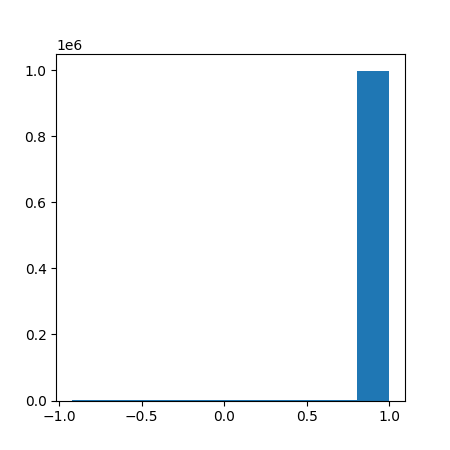

In [4]:
fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.hist(muArray)